![Recipes](https://www.pngitem.com/pimgs/m/87-877725_recipes-png-transparent-png.png)


### Project Overview

Exploring the dynamics of user sentiments, behavior patterns, and recipe interactions, this project delves into the 'Recipe Reviews and User Feedback Dataset' to derive insights, develop a personalized recipe recommendation system, and enhance the culinary experience on online platforms.

## Background

The "Recipe Reviews and User Feedback Dataset" is a comprehensive repository of data encompassing various aspects of recipe reviews and user interactions. It includes essential information such as the recipe name, its ranking on the top 100 recipes list, a unique recipe code, and user details like user ID, user name, and an internal user reputation score. Each review comment is uniquely identified with a comment ID and comes with additional attributes, including the creation timestamp, reply count, and the number of up-votes and down-votes received. Users' sentiment towards recipes is quantified on a 1 to 5 star rating scale, with a score of 0 denoting an absence of rating.  It offers a window into the dynamics of recipe reviews and user feedback within the culinary website domain.

## Business Problem

 Bay Bistro food company wants to enhance user engagement and satisfaction on its recipe platform by providing personalized recipe recommendations to users. The existing platform has a vast collection of recipes, but users often struggle to discover new recipes that match their preferences.
 Through this Miles group has been tasked to address this challenge by developing a recommendation system that analyzes user interactions and feedback to suggest relevant recipes tailored to each user's tastes and preferences.

### Objectives
**Detailed Sentiment Analysis**: Utilize the star ratings and review comments to conduct a nuanced sentiment analysis, exploring the relationship between user sentiment and review attributes such as up-votes/down-votes and reply counts.

**User Behavior Analysis**:
Understand user preferences and behavior by analyzing recipe reviews, ratings, and interactions.
Identify popular recipes and trending ingredients based on user feedback.

**Personalized Recipe Recommendations:**
Develop a recommendation algorithm to suggest recipes tailored to each user's taste and preferences.
Utilize collaborative filtering and content-based filtering techniques to enhance personalized recommendations.

**User Interface and Experience Design:**
Develop an intuitive and user-friendly interface for users to easily browse recipes, read reviews, and receive recommendations.


## Data Understanding
The data set contains the following columns:
1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}

In [2]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split,cross_validate
from surprise import KNNWithMeans



In [3]:
#loading the data set
df1=pd.read_csv('Recipe.csv',index_col=0)
df1.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0.0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0.0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0.0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2.0,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1.0,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [4]:
#loading the data set
df2=pd.read_csv('ingredients.csv')
df2.head()

,recipe_name,ingredients,cooking_instructions
0,Creamy White Chili,"1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti..."
1,Best Ever Banana Bread,"2-3 ripe bananas, mashed\n1/3 cup melted butte...",1. Preheat oven to 350°F (175°C). Grease a 9x5...
2,Cheeseburger Soup,"1 lb ground beef\n1 onion, chopped\n2 cloves g...","1. In a large pot, brown ground beef over medi..."
3,Amish Breakfast Casserole,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,Pumpkin Spice Cupcakes with Cream Cheese Frosting,For the cupcakes:\n1 1/2 cups all-purpose flou...,For the cupcakes:\n1. Preheat oven to 350°F (1...


In [5]:
#checking data shape
df2.shape

(100, 3)

In [6]:
#checking data shape
df1.shape

(18182, 14)

In [7]:
#checking data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18182 entries, 0 to 118
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_number    18182 non-null  int64  
 1   recipe_code      18182 non-null  int64  
 2   recipe_name      18182 non-null  object 
 3   comment_id       18182 non-null  object 
 4   user_id          18182 non-null  object 
 5   user_name        18182 non-null  object 
 6   user_reputation  18182 non-null  int64  
 7   created_at       18182 non-null  int64  
 8   reply_count      18160 non-null  float64
 9   thumbs_up        18182 non-null  int64  
 10  thumbs_down      18182 non-null  int64  
 11  stars            18182 non-null  int64  
 12  best_score       18182 non-null  int64  
 13  text             18180 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 2.1+ MB


In [8]:
#checking data information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   recipe_name           100 non-null    object
 1   ingredients           99 non-null     object
 2   cooking_instructions  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


### Data Preprocessing

Data Cleaning

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

- Completeness: This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

- Consistency: The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.

- Validity: Validity refers to the accuracy and relevance of the data. Data validation techniques will be applied to verify that the values within each variable align with expected ranges or predefined criteria. Any invalid or erroneous data points will be rectified or removed from the dataset.

- Uniformity: Uniformity is crucial during the data cleaning process to ensure consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### Completeness
To achieve completeness in our data, I will be checking for missing values in the data.

In [9]:
# Check for null values
print(f'The data has {df1.isna().sum().sum()} missing values')

The data has 24 missing values


In [10]:
# Check for null values
print(f'The data has {df2.isna().sum().sum()} missing values')

The data has 1 missing values


In [11]:
# Define a function to explore missing data
def missing_data(df1):
    missing_data = df1.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [12]:
# Define a function to explore missing data
def missing_data(df2):
    missing_data = df2.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [13]:
# expanding the number of visible columns
pd.set_option('display.max_columns', None)

In [14]:
# Apply missing_data function to the dataframe
missing_data(df1).T

,reply_count,text
0,22,2


In [15]:
# Apply missing_data function to the dataframe
missing_data(df2).T

,ingredients
0,1


In [16]:
# Fill missing values in 'reply_count' column with 0
df1['reply_count'].fillna(0, inplace=True)

In [17]:
# Droping rows where the "text" column is missing
df1 = df1.dropna(subset=['text'])

In [18]:
# Droping rows where the "ingredients" column is missing
df2 = df2.dropna(subset=['ingredients'])

In [19]:
# converting 'created_at' to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'], unit='s')

In [20]:
# checking to see if missing values have been replaced
print(f'The data has {df1.isna().sum().sum()} missing values')

The data has 0 missing values


In [21]:
# checking to see if missing values have been replaced
print(f'The data has {df2.isna().sum().sum()} missing values')

The data has 0 missing values


### Consistency
For the data to be constistent, I need to resolve any inconsistencies by checking for duplicate values in our data.

In [22]:
# checking for duplicates
print(f'The data has {df1.duplicated().sum()} duplicates')

The data has 0 duplicates


In [23]:
# checking for duplicates
print(f'The data has {df2.duplicated().sum()} duplicates')

The data has 0 duplicates


- The data has no duplicate values

### Validity

For our data to be valid, I have to verify that every column is accurate and appropriate for this analysis and remove those that are invalid.

In [24]:
#validity checks
df1.head(2)

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0.0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0.0,7,0,5,724,Bush used to have a white chili bean and it ma...


In [25]:
#validity checks
df2.head(2)

,recipe_name,ingredients,cooking_instructions
0,Creamy White Chili,"1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti..."
1,Best Ever Banana Bread,"2-3 ripe bananas, mashed\n1/3 cup melted butte...",1. Preheat oven to 350°F (175°C). Grease a 9x5...


### Uniformity
- For our data to be uniform, I have to verify that every column is correct and convert them to there appropriate data type.

In [26]:
#checking for data types
df1.dtypes

recipe_number               int64
recipe_code                 int64
recipe_name                object
comment_id                 object
user_id                    object
user_name                  object
user_reputation             int64
created_at         datetime64[ns]
reply_count               float64
thumbs_up                   int64
thumbs_down                 int64
stars                       int64
best_score                  int64
text                       object
dtype: object

In [27]:
#Converting data types 'reply_count' to integer
df1['reply_count'] = df1['reply_count'].astype(int)

In [28]:
# Convert user_id to integer values
df1['user_id'] = df1['user_id'].rank(method='dense').astype(int)

## Feature engineering

In [29]:
#Merging df1 and df2
df=pd.merge(df1,df2, on='recipe_name',how='left')


In [30]:
# Rename the "stars" column to "ratings"
df.rename(columns={'stars': 'ratings'}, inplace=True)

In [31]:
# Extract column and create a new 'month' column
df['month'] = df['created_at'].dt.month

In [33]:
#Creating a new column 'average_rating' with the calculated mean value
df['average_rating']=df['ratings'].mean()

In [34]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,ratings,best_score,text,ingredients,cooking_instructions,month,average_rating
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,13114,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...","1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti...",10,4.288724
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,13276,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,"1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti...",10,4.288724
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,13695,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,"1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti...",9,4.288724
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,13533,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...","1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti...",8,4.288724
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,13433,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,"1 lb chicken breast, diced\n1 onion, chopped\n...","In a large pot, cook diced chicken breast unti...",10,4.288724


### EXPLORATORY DATA ANALYSIS

#### Visualization of rating distribution

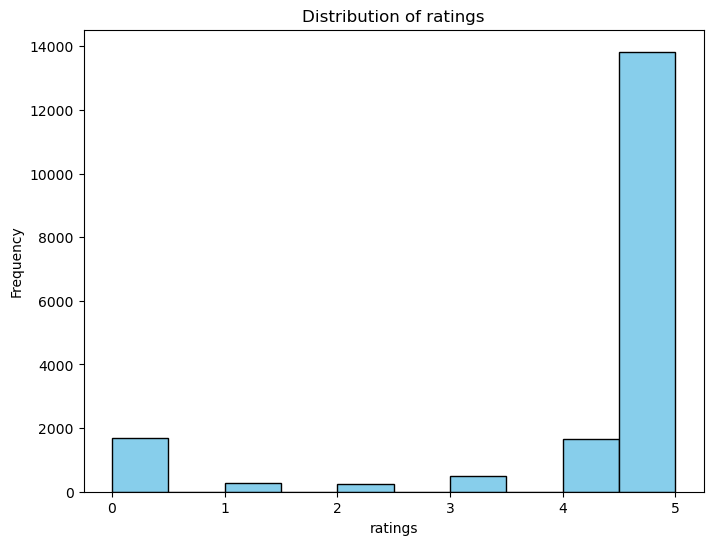

In [35]:
# Plotting with seaborn and matplotlib
plt.figure(figsize=(8, 6))
plt.hist(df['ratings'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of ratings')
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.show()

`Observation`

There seems to be a concentration of bars on the right side of the graph, suggesting a higher frequency of recipes receiving positive ratings.However, there's also a range of ratings, indicating some variation in user preferences.

#### Visualizing rating trends over months

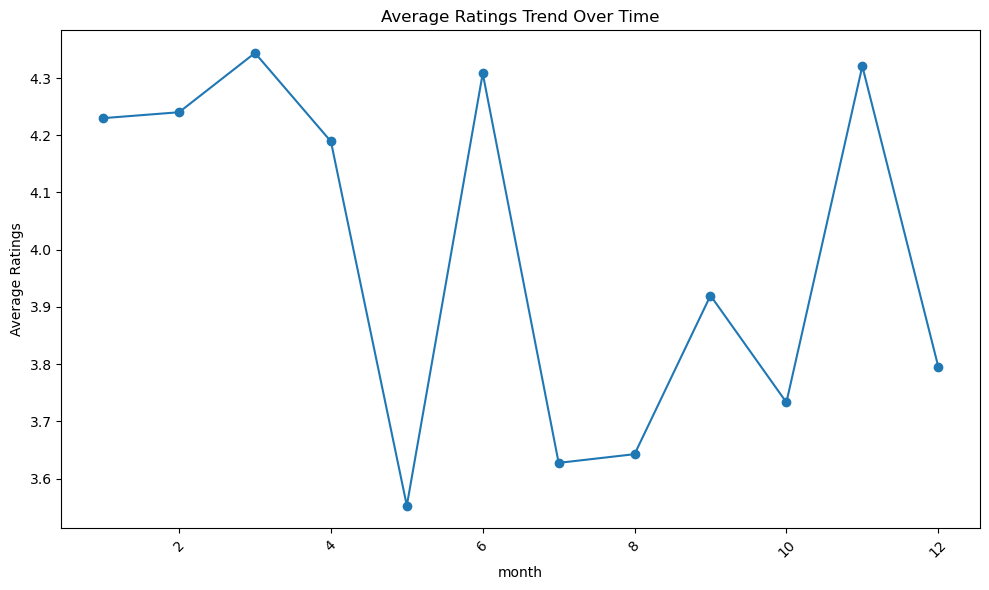

In [36]:
# Grouping by month to calculate average ratings
ratings_trend = df.groupby('month')['ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ratings_trend['month'], ratings_trend['ratings'], marker='o')
plt.title('Average Ratings Trend Over Time')
plt.xlabel('month')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()




`Observation`

- The line shows some fluctuations in the average rating over time.There's a possibility of a slight downward trend in the average rating as the months progress

### Top 5 recipes

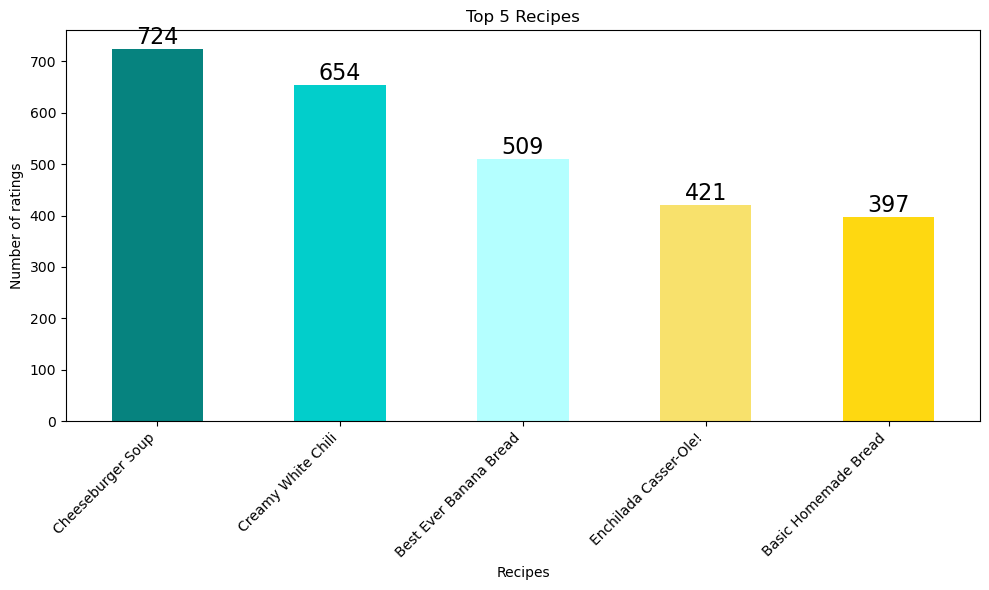

In [37]:
# Group by recipe and count the number of stars, then sort in descending order
top_10_recipes = df.groupby('recipe_name')['ratings'].count().sort_values(ascending=False).head()
# list of custom colors for the bars
custom_colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']
# bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = top_10_recipes.plot(kind='bar', color=custom_colors)
plt.title('Top 5 Recipes')
plt.xlabel('Recipes')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the number of ratings on top of each bar
for i, v in enumerate(top_10_recipes):
 ax.text(i, v, str(v), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

### Visualization Top 10 recipe

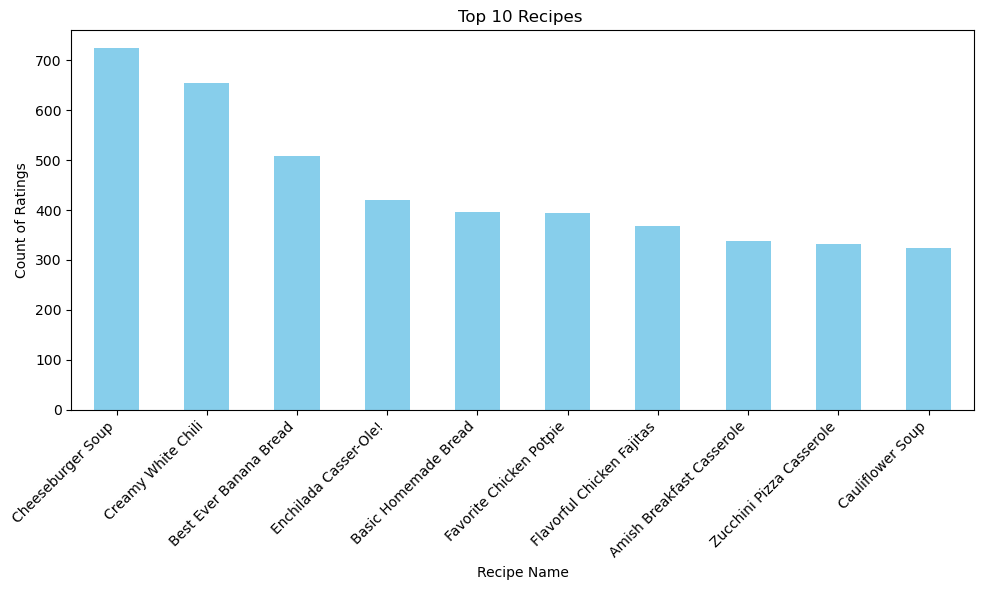

In [38]:
# Group by recipe_name and count the number of ratings
top_10_recipes = df['recipe_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_recipes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Recipes ')
plt.xlabel('Recipe Name')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 `Observation`

 The graph suggests that Cheeseburger Soup,Creamy White Chili,Best Ever Banana Bread,Enchilada Casserole-Ole!,Basic Homemade Bread,Favorite Chicken Potpie,Flavorful Chicken Fajitas,Amish Breakfast Casserole,Zucchini Pizza Casserole,Cauliflower Soupthese  are the most popular recipes among users based on the number of ratings they have received

#### Multivariate Analysis

Our aim here is to look for the relationship between different features

First we look at the correlation of the numeric columns using Pearson's coefficient

In [39]:
# Pearson coefficient of numeric columns
numerical_columns_df = df[[
    'user_reputation',
    'reply_count',
    'thumbs_up',
    'thumbs_down',
    'ratings',
    'best_score'

]]
numerical_columns_df.corr()

,user_reputation,reply_count,thumbs_up,thumbs_down,ratings,best_score
user_reputation,1.000000,0.010609,0.057860,0.022888,0.015560,0.137896
reply_count,0.010609,1.000000,0.208786,0.327619,-0.119689,0.201303
thumbs_up,0.057860,0.208786,1.000000,0.373248,-0.050872,0.684834
thumbs_down,0.022888,0.327619,0.373248,1.000000,-0.142549,0.215397
ratings,0.015560,-0.119689,-0.050872,-0.142549,1.000000,-0.034245
best_score,0.137896,0.201303,0.684834,0.215397,-0.034245,1.000000


`Observations`

 The correlation matrix provides valuable insights into the relationships between different features.
 For instance, thumbs up and best score have a strong positive correlation, suggesting that users who give more thumbs up tend to have higher best scores. On the other hand, reply count and ratings have a weak negative relationship, implying that users who reply more may give slightly lower ratings.

### MODELLING

## Item-Based Collaborative Filtering

its recommendation technique that focuses on the similarity between items rather than between users.

In [40]:
#preparing the data by converting the provided DataFrame to a surprise dataset
ratings_df = pd.DataFrame(df)

# Define the reader object
reader = Reader(rating_scale=(0, 100))

# Load data from DataFrame
data = Dataset.load_from_df(ratings_df[['user_id', 'recipe_code', 'ratings']], reader)


In [41]:
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Use item-based collaborative filtering
algo_item_based = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item_based.fit(trainset)

# Predict ratings for the test set
predictions_item_based = algo_item_based.test(testset)

# Print RMSE (Root Mean Square Error)
from surprise import accuracy
print("Item-Based CF RMSE:", accuracy.rmse(predictions_item_based))
print("Item-Based CF MAE:", accuracy.mae(predictions_item_based))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5185
Item-Based CF RMSE: 1.5185457790767714
MAE:  1.0000
Item-Based CF MAE: 1.0000236522925245


`Observation`

The reported RMSE of 1.5476 and MAE of 1.0135 suggest that the item-based collaborative filtering model using Pearson-baseline similarity performs reasonably well.

### User-Based Collaborative Filtering
 The recommendation technique used in information filtering systems to provide personalized recommendations to users

In [42]:
# Use user-based collaborative filtering
algo_user_based = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user_based.fit(trainset)

# Predict ratings for the test set
predictions_user_based = algo_user_based.test(testset)

# Print RMSE (Root Mean Square Error)
print("User-Based CF RMSE:", accuracy.rmse(predictions_user_based))
print("User-Based CF MAE:",accuracy.mae(predictions_user_based))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5412
User-Based CF RMSE: 1.5412465746901716
MAE:  0.9857
User-Based CF MAE: 0.9856940381415084


`Observation`
- The RMSE value of 1.5642 indicates that on average, the model's predictions deviate from the actual values by about 1.5642 units
- The MAE value of 0.9911 indicates that on average, the absolute difference between the model's predictions and the actual values is 0.9911 units.
- The reported RMSE of 1.5642 and MAE of 0.9911 suggest that the user-based collaborative filtering model performs reasonably well

## Single Value Decomposition

In [43]:
from surprise import SVD
# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD
model = SVD()

# Fit the model
model.fit(trainset)

# Predict ratings for the test set
predictions = model.test(testset)

# Print RMSE (Root Mean Square Error)
print("SVD RMSE:", accuracy.rmse(predictions))
print("SVD MAE:", accuracy.mae(predictions))

RMSE: 1.4452
SVD RMSE: 1.4452242493407155
MAE:  0.9874
SVD MAE: 0.987408243979533


`Observation`

The reported RMSE of 1.4522 and MAE of 0.9920 suggest that the SVD model is performing reasonably well, with an average deviation of about 1.4522 units from the actual values and an average absolute difference of 0.9920 units. The lower MAE compared to RMSE indicates that the model has some larger errors, but overall, it is making accurate predictions.

### Recommendations based on SVD

To generate recommendations using SVD, a userID to whom which recommendations are to be made is taken an input. SVD model
is used to predicted rating for each recipe which represent how much the user might like each recipe. The ratings are sorted in a
descending order and recommendations is given to the user.


In [44]:
# Recommend movies for a specific user (user_id = 1 in this example)
user_id = 13114
user_recipe = df[df['user_id'] == user_id]['recipe_code'].unique()
# Generate recommendations for the user
recommended_recipe = []
for recipe_code in df['recipe_code'].unique():
 if recipe_code not in user_recipe:
  predicted_ratings = model.predict(user_id, recipe_code).est
  recommended_recipe.append((recipe_code, predicted_ratings))

# Sort recommended movies by predicted rating
recommended_recipe.sort(key=lambda x: x[1], reverse=True)

# Print top 10 recommended recipes
for recipe_code, predicted_rating in recommended_recipe[:10]:
 recipe_name = df[df['recipe_code'] == recipe_code]['recipe_name'].iloc[0]
 print(f"Recipe Name: {recipe_name}, Recipe code: {recipe_code}, Predicted Rating: {predicted_rating}")

Recipe Name: Pumpkin Bread, Recipe code: 1196, Predicted Rating: 4.981130116258023
Recipe Name: Zucchini Pizza Casserole, Recipe code: 2912, Predicted Rating: 4.932807429596204
Recipe Name: Stuffed Pepper Soup, Recipe code: 2872, Predicted Rating: 4.904190692862158
Recipe Name: Flavorful Chicken Fajitas, Recipe code: 12540, Predicted Rating: 4.83564930406671
Recipe Name: Forgotten Jambalaya, Recipe code: 39549, Predicted Rating: 4.809250761104764
Recipe Name: Peanut Butter Chocolate Dessert, Recipe code: 19201, Predicted Rating: 4.799245692897149
Recipe Name: Special Banana Nut Bread, Recipe code: 38550, Predicted Rating: 4.797829618249356
Recipe Name: Corn Pudding, Recipe code: 31278, Predicted Rating: 4.793049309831046
Recipe Name: Rustic Italian Tortellini Soup, Recipe code: 41101, Predicted Rating: 4.7740273809674525
Recipe Name: Pumpkin Spice Cupcakes with Cream Cheese Frosting, Recipe code: 42386, Predicted Rating: 4.767826261856197


`Observation`

The output represents top recommended recipes along with their predicted ratings. These recommendations  help users discover popular and potentially enjoyable recipes, enhancing user engagement and satisfaction with the recipe platform or service.

### Hyperparameter tunning

In [45]:
from surprise.model_selection import GridSearchCV
# Define parameter grid
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 30, 40], 'lr_all': [0.001, 0.002, 0.005]}
# Instantiate SVD
model = SVD()

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(data)
# Get best parameters
best_params = grid_search.best_params['rmse']
print("Best parameters:", best_params)
#getting rmse score
cv_results = grid_search.cv_results

# Extract RMSEand MAE values
rmse_values = cv_results['mean_test_rmse']
mae_values = cv_results['mean_test_mae']

# Print RMSE and MAE values
print("RMSE values:", rmse_values)
print("MAE values:", mae_values)

Best parameters: {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.005}
RMSE values: [1.51080703 1.50184159 1.47357425 1.50723455 1.49057292 1.47070934
 1.50237585 1.48051133 1.46663291 1.50879963 1.49816644 1.47184298
 1.5039401  1.48524892 1.46895161 1.49769054 1.47674597 1.46714238
 1.50771283 1.49500869 1.4707144  1.50180285 1.48032521 1.4679894
 1.49476481 1.47336975 1.46763892]
MAE values: [1.04145712 1.03530206 1.00645626 1.03854854 1.02493933 0.99309057
 1.03507656 1.01486865 0.98454582 1.03924238 1.03229089 0.99913775
 1.0361528  1.02053049 0.98914543 1.03051499 1.00844863 0.98180088
 1.03861048 1.02824191 0.997368   1.03404887 1.01424494 0.98555549
 1.0273429  1.00240016 0.98171078]


`Observation`
- The RMSE values range from 1.4619 to 1.5099, with the lowest value being 1.4619
- The MAE values range from 0.9810 to 1.0414, with the lowest value being 0.9810.

The range of RMSE and MAE values suggests that the SVD model with the specified parameters performs reasonably well on the dataset. The lowest RMSE value of 1.4619 and the lowest MAE value of 0.9810 indicate the best predictive performance of the model.

---



In [46]:
# Initialize and train the SVD model
model = SVD(**best_params)
trainset = data.build_full_trainset()
model.fit(trainset)

# Get the list of all recipe codes
all_recipe_codes = df['recipe_code'].unique()

# Generate top-10 recipe recommendations for each user
top_n = {}
for uid in df['user_id'].unique():
    # Exclude recipes already rated by the user
    user_recipe_rated = df.loc[df['user_id'] == uid, 'recipe_code']
    recipe_to_predict = [rid for rid in all_recipe_codes if rid not in user_recipe_rated]

    # Predict ratings for recipes not yet rated by the user
    predictions = [model.predict(uid, rid) for rid in recipe_to_predict]

    # Sort predictions by estimated rating
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Get top 10 recipe recommendations
    top_n[uid] = [(pred.iid, pred.est) for pred in sorted_predictions[:10]]

# Print the top 10 recommendations for a specific user

print(f"Top 10 recipe recommendations for user {uid}:")
for rank, (recipe_code, estimated_rating) in enumerate(top_n[uid], start=1):
    print(f"{rank}: Recipe Code {recipe_code} (Estimated Rating: {estimated_rating})")

Top 10 recipe recommendations for user 845:
1: Recipe Code 82745 (Estimated Rating: 5.037843596051413)
2: Recipe Code 14600 (Estimated Rating: 5.026029851266734)
3: Recipe Code 8431 (Estimated Rating: 5.004513446116708)
4: Recipe Code 12540 (Estimated Rating: 4.9986773760077705)
5: Recipe Code 19201 (Estimated Rating: 4.925508075200486)
6: Recipe Code 31278 (Estimated Rating: 4.893689415677744)
7: Recipe Code 9739 (Estimated Rating: 4.877216427412279)
8: Recipe Code 27626 (Estimated Rating: 4.86463202226045)
9: Recipe Code 1196 (Estimated Rating: 4.860214742277182)
10: Recipe Code 41101 (Estimated Rating: 4.818294492806762)


- The estimated ratings are numerical values generated by the SVD model, representing how much the model predicts the user would like each recipe.
- Higher estimated ratings indicate recipes that the model believes the user is more likely to enjoy or rate highly.

#### Non- negative Matrix Factorization

This is a matrix Factorization technique that factors the user-item interaction matrix into non-negative matrices.

Non-negative Matrix Factorization (NMF) offers a parts-based, interpretable representation of the data, making it particularly useful for recommendation systems. It can capture latent features or topics that represent underlying preferences or characteristics of users and items.

NMF will help enhance the performance and scalability of recommendation systems

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4985  1.5617  1.5241  1.5572  1.5125  1.5308  0.0248  
MAE (testset)     1.0280  1.0658  1.0440  1.0650  1.0270  1.0460  0.0170  
Fit time          1.48    1.46    1.45    1.44    1.47    1.46    0.01    
Test time         0.05    0.03    0.04    0.03    0.04    0.04    0.00    
Cross-validation results: {'test_rmse': array([1.49845634, 1.56167143, 1.52414304, 1.55716943, 1.51245449]), 'test_mae': array([1.02800579, 1.06579125, 1.04404238, 1.06504887, 1.02696476]), 'fit_time': (1.4769039154052734, 1.4550654888153076, 1.452486276626587, 1.4375526905059814, 1.4689743518829346), 'test_time': (0.04710745811462402, 0.034889936447143555, 0.03647184371948242, 0.03488779067993164, 0.04046320915222168)}


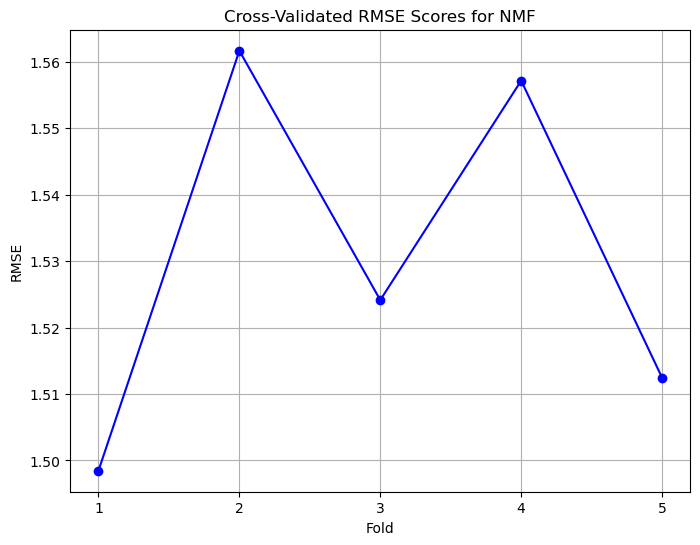

In [47]:
from surprise import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

# NMF algorithm
nmf = NMF()

# Perform cross-validation
cv_results = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# Extract RMSE scores
rmse_scores = cv_results['test_rmse']

print("Cross-validation results:", cv_results)

# Plot RMSE scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validated RMSE Scores for NMF')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


- The cross-validation results indicate the average RMSE and MAE values obtained across all folds, which are 1.5308 and 1.0460, respectively.

The NMF algorithm has an average RMSE of approximately 1.5308 and an average MAE of approximately 1.0460 across the 5 folds. The model takes an average of 1.48 seconds to fit and 0.03 seconds to test on each fold.

  Below we give recipe recommendation  for user_ id `13695` based on ratings

In [48]:
# getting a list of all recipe ids
np.random.seed(42)
all_recipe_ids=np.unique(df['recipe_code'])

# predicted ratings for all recipe in your dataset for use Id 3.
user_id = 13695

# Create a list to store predicted ratings
predicted_ratings = []
for recipe_code in all_recipe_ids:
 predicted_rating = nmf.predict(user_id, recipe_code).est
 predicted_ratings.append((recipe_code, predicted_rating))

#sorting predicted_ratings in descending order
predicted_ratings.sort(key=lambda x:x[1], reverse=True)

In [49]:
# getting the top 5 recommendations
top_5_recommendations=predicted_ratings[:5]
top_5_recommendations

[(26937, 4.903448705968933),
 (14299, 4.875007441359613),
 (39581, 4.8484307874161505),
 (386, 4.774499835660384),
 (18345, 4.723406232998248)]

In [50]:
# top 5 recommended recipes to the user
for recipe_code, predicted_rating in top_5_recommendations:
 recipe_title = df[df['recipe_code'] == recipe_code]['recipe_name'].values[0]
 print(f"Recipe Name: {recipe_name}, Predicted Rating: {predicted_rating}")


Recipe Name: Pumpkin Spice Cupcakes with Cream Cheese Frosting, Predicted Rating: 4.903448705968933
Recipe Name: Pumpkin Spice Cupcakes with Cream Cheese Frosting, Predicted Rating: 4.875007441359613
Recipe Name: Pumpkin Spice Cupcakes with Cream Cheese Frosting, Predicted Rating: 4.8484307874161505
Recipe Name: Pumpkin Spice Cupcakes with Cream Cheese Frosting, Predicted Rating: 4.774499835660384
Recipe Name: Pumpkin Spice Cupcakes with Cream Cheese Frosting, Predicted Rating: 4.723406232998248


## Deep Learning Matrix Facrorization

Matrix Factorization with Embedding Layer

Matrix factorization with embeddings is a popular approach in recommendation systems to model user-item interactions. It aims to
decompose the user-item interaction matrix into lower-dimensional embeddings for users and items (recipe in this case). These
embeddings capture latent features that represent users' preferences and items' characteristics. By learning these embeddings, the
model can predict how users would rate unseen items, enabling personalized recommendations.

splitting the data into training and validation sets for recomendation model

In [51]:
from sklearn.model_selection import train_test_split
# 'rating'becomes the target variable 'y'
y = df['ratings']
# 'userId' and 'recipe_code' are feature data 'X'
X = df[['user_id', 'recipe_code']]
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


calculating number of unique users and recipe to determine the dimensions of the embendding layers

In [52]:
# the maximum user ID in the dataset and add 1 to account for 0-based indexing
num_users = df['user_id'].max() + 1
# the maximum movie ID in the dataset and add 1 to account for 0-based indexing
num_recipe = df['recipe_code'].max() + 1

 Neural Collaborative Filtering Model

In [53]:
from keras.layers import Input, Embedding, Flatten,Concatenate, Dense
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(42)

# Define embedding dimensions
embedding_dim = 40
# Define input layers
user_input = Input(shape=(1,), name='User_Input')
recipe_input = Input(shape=(1,), name='Recipe_Input')

# Define embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='User_Embedding')(user_input)
recipe_embedding = Embedding(input_dim=num_recipe, output_dim=embedding_dim, name='Recipe_Embedding')(recipe_input)

# Flatten the embeddings
user_flat = Flatten(name='User_Vector')(user_embedding)
recipe_flat = Flatten(name='Recipe_Vector')(recipe_embedding)

# Concatenate user and recipe embeddings
concatenated = Concatenate(name='Concatenate')([user_flat, recipe_flat])
# Define your model's architecture
dense_layer = Dense(100, activation='relu', name='dense')(concatenated)
output_layer = Dense(1, activation='linear', name='Output')(dense_layer)
# Create the model
model = Model(inputs=[user_input, recipe_input], outputs=output_layer)

In [54]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ User_Input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Recipe_Input (InputLayer)     │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ User_Embedding (Embedding)    │ (None, 1, 40)             │         552,520 │ User_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Recipe_Embedding (Embedding)  │ (None, 1, 40)             │       7,671,040 │ Recipe_Input[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ User_Vector (Flatten)         │ (None, 40)                │               0 │ User_Embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Recipe_Vector (Flatten)       │ (None, 40)                │               0 │ Recipe_Embedding[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Concatenate (Concatenate)     │ (None, 80)                │               0 │ User_Vector[0][0],         │
│                               │                           │                 │ Recipe_Vector[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 100)               │           8,100 │ Concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Output (Dense)                │ (None, 1)                 │             101 │ dense[0][0]                │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 8,231,761 (31.40 MB)

 Trainable params: 8,231,761 (31.40 MB)

 Non-trainable params: 0 (0.00 B)

`Observation`

This model takes user and recipe IDs, converts them into embeddings, concatenates these embeddings, passes them through dense layers, and finally predicts a rating. The model is relatively large due to the high number of parameters, especially in the embedding layers.








In [57]:
#TensorFlow Model Compilation with Custom MAE Metric
import tensorflow as tf
# Custom mse metric function
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  
    return tf.reduce_mean(tf.abs(y_pred - y_true))
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error', rmse])


In [58]:
# Training the Model on User and Recipe_code with Ratings
history = model.fit(
 [X_train['user_id'].values, X_train['recipe_code'].values], # Input data for User and recipe_code
 y_train , # Target values (ratings)
 epochs=20, # Number of training epochs
 batch_size=128, # Batch size for training
 validation_data=([X_val['user_id'].values, X_val['recipe_code'].values], y_val) # Validation data
)


Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 15.3700 - mean_absolute_error: 3.5668 - rmse: 3.5668 - val_loss: 2.2426 - val_mean_absolute_error: 1.0524 - val_rmse: 1.0505
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 2.1306 - mean_absolute_error: 1.0061 - rmse: 1.0061 - val_loss: 2.2285 - val_mean_absolute_error: 1.1262 - val_rmse: 1.1234
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.1580 - mean_absolute_error: 0.7224 - rmse: 0.7224 - val_loss: 2.7659 - val_mean_absolute_error: 1.3895 - val_rmse: 1.3865
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.4962 - mean_absolute_error: 0.4725 - rmse: 0.4725 - val_loss: 2.6230 - val_mean_absolute_error: 1.3265 - val_rmse: 1.3254
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.4361 - mean_absolute_error: 0.4718 - rmse: 0.4718 - val_loss: 2.6674 - val_mean_absolute_error: 1.3430 - val_rmse: 1.3408
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.3877 - mean

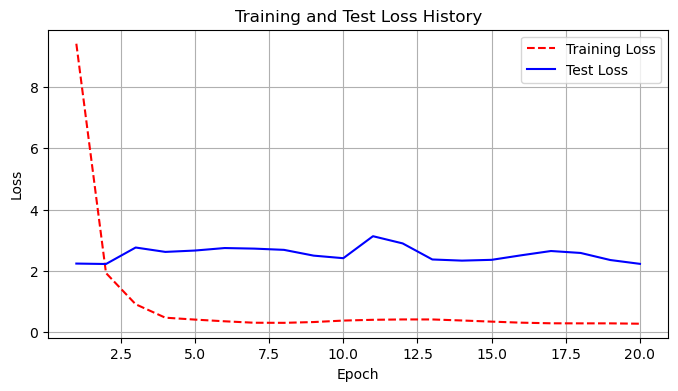

In [59]:
# training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.figure(figsize=(8, 4))
plt.plot(epoch_count, training_loss, 'r--', label='Training Loss')
plt.plot(epoch_count, test_loss, 'b-', label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss History')
plt.grid(True)
plt.show()


The graph suggests that there's no simple relationship between a recipe's complexity and its average rating in this dataset. Complex recipes can be highly rated, and simple recipes can also be well-received

Generating Top Recipe Recommendations for a User `13695 `

In [60]:
#Generating Top Recipe Recommendations for a User `13695 `
user_id = 13695
all_recipe_ids = np.unique(ratings_df['recipe_code'])

predicted_ratings = []

for recipe_code in all_recipe_ids:
    # Predict the rating for the user and recipe
    predicted_rating = model.predict([np.array([user_id]), np.array([recipe_code])])[0][0]


    # Clip the predicted rating to the range of 0.5 to 5.0
    predicted_rating = max(0.5, min(predicted_rating, 5.0))

    predicted_ratings.append((recipe_code, predicted_rating))

# Sort the predicted ratings to find top recommendations
predicted_ratings.sort(key=lambda x: x[1], reverse=True)
top_recommendations = predicted_ratings[:10]

# Print top recommendations
print("Top 10 Recommended Recipes for User", user_id)

for i, (recipe_code, predicted_rating) in enumerate(top_recommendations):
    recipe_name = df.loc[df['recipe_code'] == recipe_code, 'recipe_name'].iloc[0]
    print(f"Top {i+1}: {recipe_name} (Predicted Rating: {predicted_rating})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

The recommendations are based on the predicted ratings generated by the recommendation model for the  user. The predicted ratings are sorted in descending order to identify the top 10 recipes that the user is most likely to enjoy. Recipes with higher predicted ratings are considered to be more aligned with the user's preferences, while those with lower ratings may be less preferred.

In [65]:
import pickle

# File path to save the pickle file
pickle_file_path = 'top_recommendations.pkl'

# Save the top_recommendations list to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(top_recommendations, file)

print("Top recommendations saved to:", pickle_file_path)



Top recommendations saved to: top_recommendations.pkl
